In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [4]:
#loading the csv data to a pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [5]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [10]:
# information about the data :
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
# number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
# statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Finding correlation between data :

### 1. Positive Correlation


Variables are directly proportional.

### 2. Negative Correlation

Variables are inversely proportional.

In [17]:
gold_data = gold_data.drop('Date',axis=1)

In [18]:
correlation = gold_data.corr()

## Constructing a heat map to understand the correlation.

<Axes: >

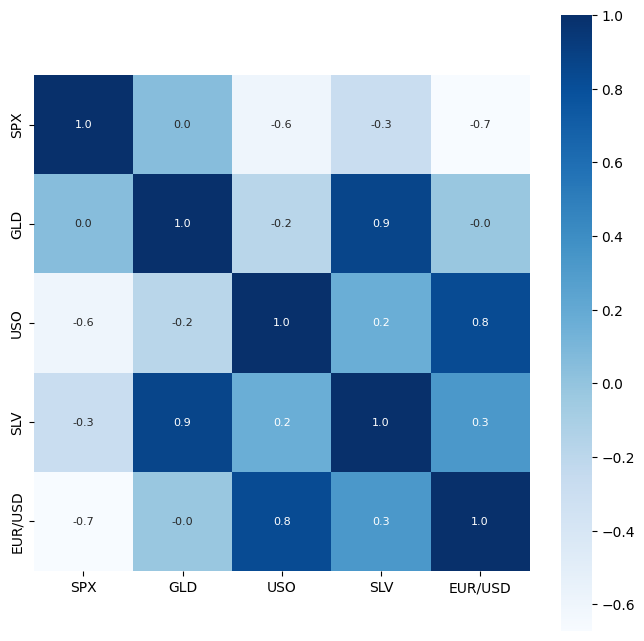

In [20]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot= True, annot_kws = {'size':8},cmap='Blues')

### Correlation Values of GLD

In [21]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Checking the distribution of the Gold Price

<Axes: xlabel='GLD', ylabel='Count'>

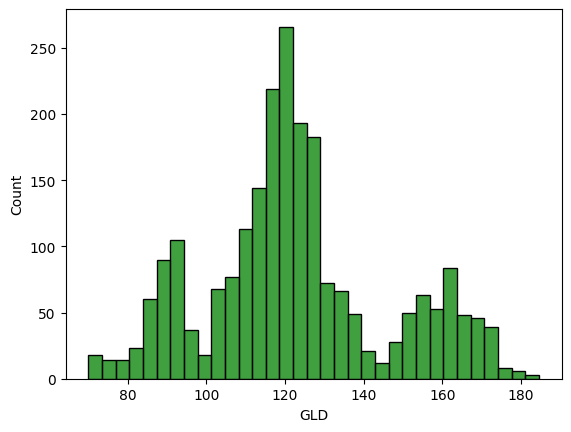

In [28]:
sns.histplot(gold_data['GLD'], color ='green')

### Splitting the Features and the Target

In [30]:
X = gold_data.drop(['GLD'], axis = 1)
Y = gold_data['GLD']

In [31]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting into Training Data and Test Data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state = 2)

## MODEL TRAINING : Random Forest Regressor

In [36]:
regressor = RandomForestRegressor(n_estimators=100)

### Training the model

In [37]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

## MODEL EVALUATION

### Prediction on Test Data

In [41]:
test_data_prediction = regressor.predict(X_test)

In [42]:
print(test_data_prediction)

[168.76609941  82.3999996  115.9528003  127.62120073 120.61210137
 154.81099698 150.28039865 126.06420073 117.57399878 126.11330058
 116.56270111 171.38810055 140.85169792 167.75699826 115.28670004
 117.70780092 139.59010238 170.24350104 160.03290291 158.5609998
 155.13239952 125.28569996 176.1270994  157.48020358 125.30400028
  93.84619986  77.59480013 120.63880028 119.14409982 167.36629992
  88.07070031 125.28370013  91.16110053 117.62880035 121.03129911
 135.71890036 115.26130139 114.91490106 146.59479962 107.13530108
 104.55900264  87.18949816 126.52670031 117.76769942 153.29279923
 119.62500017 108.30780001 108.24409877  93.15240051 127.22389759
  74.9006005  113.50979883 121.56569971 111.40879941 118.82269904
 121.00319932 159.16629971 168.15910152 147.10069669  85.8622986
  94.39020027  86.86429862  90.42060014 118.73840055 126.3994007
 127.50750041 170.16949979 122.31069915 117.45709887  98.51250063
 168.44510137 143.16859852 132.04480259 121.23320231 121.18889923
 119.74190062

## Comparing the predicted values with the actual values

### R squared values : metric

In [44]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"R squared error : {error_score}")

R squared error : 0.9893299003014459


### Compare the actual values and predicted values in a plot

In [45]:
Y_test = list(Y_test)

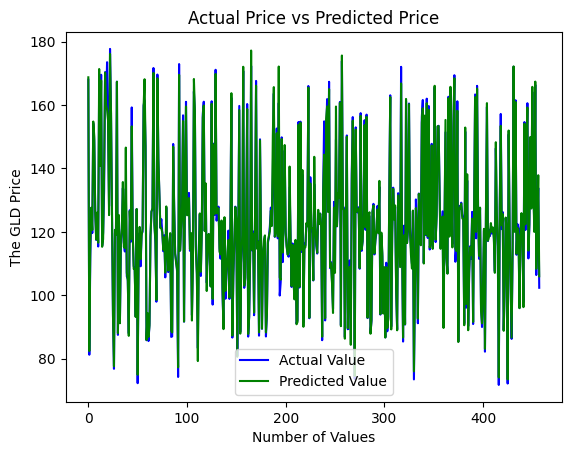

In [48]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value' )
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('The GLD Price')
plt.legend()
plt.show()